In [2]:
# Homework 2
import numpy as np
from sklearn.metrics import accuracy_score # other metrics too pls!
from sklearn.ensemble import RandomForestClassifier # more!
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import itertools
import matplotlib.pyplot as plt

In [15]:
# Homework 2
# adapt this code below to run your analysis
# 1. Write a function to take a list or dictionary of clfs and hypers(i.e. use logistic regression), each with 3 different sets of hyper parameters for each
# 2. Expand to include larger number of classifiers and hyperparameter settings
# 3. Find some simple data
# 4. generate matplotlib plots that will assist in identifying the optimal clf and parampters settings
# 5. Please set up your code to be run and save the results to the directory that its executed from
# 6. Investigate grid search function

M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
L = np.ones(M.shape[0])
n_folds = 5

data = (M, L, n_folds)

def run (a_clf, data, clf_hyper={}):
  M, L, n_folds = data # unpack data container
  kf = KFold(n_splits=n_folds) # Establish the cross validation
  ret = {} # classic explication of results

  for ids, (train_index, test_index) in enumerate(kf.split(M, L)):
    clf = a_clf(**clf_hyper) # unpack parameters into clf if they exist
    clf.fit(M[train_index], L[train_index])
    pred = clf.predict(M[test_index])
    ret[ids]= {'clf': clf,
               'train_index': train_index,
               'test_index': test_index,
               'accuracy': accuracy_score(L[test_index], pred)}
  return ret

results = run (RandomForestClassifier, data, clf_hyper={})

In [16]:
results

{0: {'clf': RandomForestClassifier(),
  'train_index': array([2, 3, 4, 5, 6, 7]),
  'test_index': array([0, 1]),
  'accuracy': 1.0},
 1: {'clf': RandomForestClassifier(),
  'train_index': array([0, 1, 4, 5, 6, 7]),
  'test_index': array([2, 3]),
  'accuracy': 1.0},
 2: {'clf': RandomForestClassifier(),
  'train_index': array([0, 1, 2, 3, 6, 7]),
  'test_index': array([4, 5]),
  'accuracy': 1.0},
 3: {'clf': RandomForestClassifier(),
  'train_index': array([0, 1, 2, 3, 4, 5, 7]),
  'test_index': array([6]),
  'accuracy': 1.0},
 4: {'clf': RandomForestClassifier(),
  'train_index': array([0, 1, 2, 3, 4, 5, 6]),
  'test_index': array([7]),
  'accuracy': 1.0}}

In [3]:

M = np.array([[1,2],[3,4],[4,5],[4,5],[4,5],[4,5],[4,5],[4,5]])
L = np.ones(M.shape[0])
n_folds = 5

data = (M, L, n_folds)

In [12]:
M, L, n_folds = data # unpack data container
kf = KFold(n_splits=n_folds) # Establish the cross validation

In [14]:
L

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
print(data)

(array([[1, 2],
       [3, 4],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5],
       [4, 5]]), array([1., 1., 1., 1., 1., 1., 1., 1.]), 5)


1. Write a function to take a list or dictionary of clfs and hypers(i.e. use logistic regression), each with 3 different sets of hyper parameters for each

In [28]:
X,y = make_classification(n_samples = 1000, n_features= 15, n_repeated=0)

In [153]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
# models = [RandomForestClassifier(), LogisticRegression()]
hypersLR = {
    'penalty' : ['l2', None],
    'C' : [1, 2, 5],
    'max_iter' : [100, 200, 500]
}

In [157]:
def LR_GS(data_X, data_y, clf_hyper={}):
    #getting keys and values from param dict
    keys,values = zip(*clf_hyper.items())
    # creating dicts of all possible combinations of params
    permutations_dicts = [dict(zip(keys,v)) for v in itertools.product(*values)]
    # fitting a new model for every combination of dict
    best = 0
    for i in range(len(permutations_dicts)):
        clf = LogisticRegression(**permutations_dicts[i])
        clf.fit(data_X,data_y)
        # we could change to test data here if we wanted, but for the sake of this function, this works
        score = clf.score(data_X,data_y)
        if score > best:
            best = score
            best_params = clf.get_params()
    # print(f'Best Params: {best_params}')
    # print(f'Accuracy: {best}')
    # return best parameters
    ret = {}
    ret['best_params'] = best_params
    ret['accuracy_score'] = best
    return ret

LR_GS(X, y, hypersLR)

{'best_params': {'C': 1,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': None,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 'accuracy_score': 0.96}

2. Expand to include larger number of classifiers and hyperparameter settings

In [158]:
hypersLR_RF = {'LR':{
    'penalty' : ['l2', None],
    'C' : [1, 2, 5],
    'max_iter' : [100, 200, 500]
    },
    'RF':{'n_estimators': [100,150,250],
    'criterion':['gini', 'entropy', 'log_loss'],
    'bootstrap': [True, False]}
}

In [162]:
clfs = [LogisticRegression(), RandomForestClassifier()]

In [175]:
def LRRF_GS(data_X, data_y, clf_hyper={}, clf_list=[]):
    best = 0
    best_params = {}
    for i in clf_list:
        if type(i) == type(LogisticRegression()):
            LR_params = clf_hyper['LR']
            #getting keys and values from param dict
            keys,values = zip(*LR_params.items())
            # creating dicts of all possible combinations of params
            permutations_dicts = [dict(zip(keys,v)) for v in itertools.product(*values)]
            for i in range(len(permutations_dicts)):
                clf = LogisticRegression(**permutations_dicts[i])
                clf.fit(data_X,data_y)
                # we could change to test data here if we wanted, but for the sake of this function, this works
                score = clf.score(data_X,data_y)
                if score > best:
                    clf_type = 'LogisticRegression'
                    best = score
                    best_params = clf.get_params()
        else:
            RF_params = clf_hyper['RF']
            #getting keys and values from param dict
            keys,values = zip(*RF_params.items())
            # creating dicts of all possible combinations of params
            permutations_dicts = [dict(zip(keys,v)) for v in itertools.product(*values)]
            for i in range(len(permutations_dicts)):
                clf = RandomForestClassifier(**permutations_dicts[i])
                clf.fit(data_X,data_y)
                # we could change to test data here if we wanted, but for the sake of this function, this works
                score = clf.score(data_X,data_y)
                if score > best:
                    clf_type = 'RandomForest'
                    best = score
                    best_params = clf.get_params()
    # print(f'Best Params: {best_params}')
    # print(f'Accuracy: {best}')
    # return best parameters
    ret = {}
    ret['Type'] = clf_type
    ret['accuracy_score'] = best
    ret['best_params'] = best_params

    return ret

LRRF_GS(X, y, hypersLR_RF, clfs)

{'Type': 'RandomForest',
 'accuracy_score': 1.0,
 'best_params': {'bootstrap': True,
  'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 'sqrt',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False}}

3. Find some simple data
4. generate matplotlib plots that will assist in identifying the optimal clf and parampters settings

In [239]:
def LRRF_GSopt(data_X, data_y, clf_hyper={}, clf_list=[]):
    best = 0
    best_params = {}
    counter_LR = 1
    counter_RF = 1
    viz_LR = {}
    viz_RF = {}
    for i in clf_list:
        if type(i) == type(LogisticRegression()):
            LR_params = clf_hyper['LR']
            #getting keys and values from param dict
            keys,values = zip(*LR_params.items())
            # creating dicts of all possible combinations of params
            permutations_dicts = [dict(zip(keys,v)) for v in itertools.product(*values)]
            for i in range(len(permutations_dicts)):
                clf = LogisticRegression(**permutations_dicts[i])
                clf.fit(data_X,data_y)
                # we could change to test data here if we wanted, but for the sake of this function, this works
                score = clf.score(data_X,data_y)
                label = str(counter_LR) + ' LR'
                viz_LR[label] = [score, clf.get_params()]
                counter_LR+=1
                if score > best:
                    clf_type = 'LogisticRegression'
                    best = score
                    best_params = clf.get_params()
        else:
            RF_params = clf_hyper['RF']
            #getting keys and values from param dict
            keys,values = zip(*RF_params.items())
            # creating dicts of all possible combinations of params
            permutations_dicts = [dict(zip(keys,v)) for v in itertools.product(*values)]
            for i in range(len(permutations_dicts)):
                clf = RandomForestClassifier(**permutations_dicts[i])
                clf.fit(data_X,data_y)
                # we could change to test data here if we wanted, but for the sake of this function, this works
                score = clf.score(data_X,data_y)
                label = str(counter_RF) + ' RF'
                viz_RF[label] = [score, clf.get_params()]
                counter_RF+=1
                if score > best:
                    clf_type = 'RandomForest'
                    best = score
                    best_params = clf.get_params()
    ret = {}
    ret['Type'] = clf_type
    ret['accuracy_score'] = best
    ret['best_params'] = best_params

    return ret, viz_LR, viz_RF 

ret, viz_LR, viz_RF = LRRF_GSopt(X, y, hypersLR_RF, clfs)

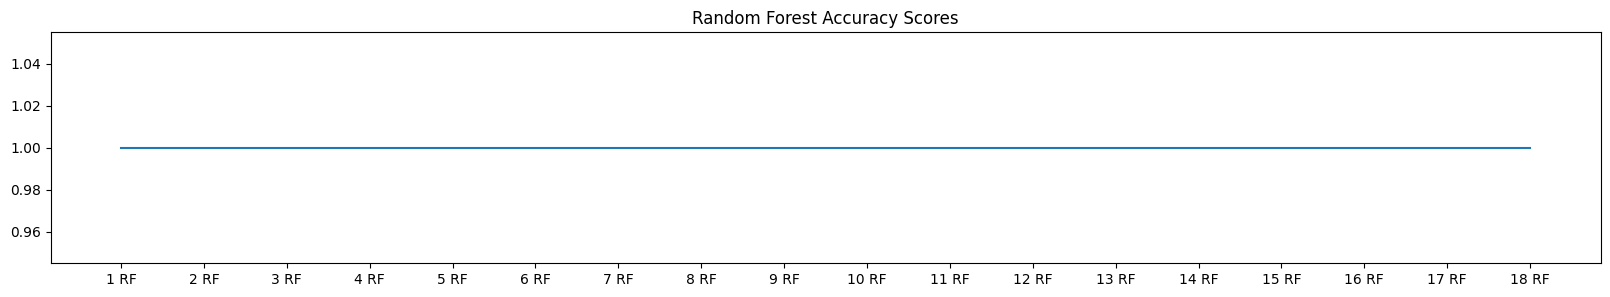

In [256]:
# Random Forest metrics are all 100 bc predictions were made from training data, obviously would not be done this way in real project, just proof-of-concept
val_list = []
for i in range(1, len(viz_RF)+1):
    label = str(i) + ' RF'
    val_acc = viz_RF[label][0]
    val_list.append(val_acc)
plt.rcParams["figure.figsize"] = (20,3)
plt.title('Random Forest Accuracy Scores')   
plt.plot(viz_RF.keys(), val_list)


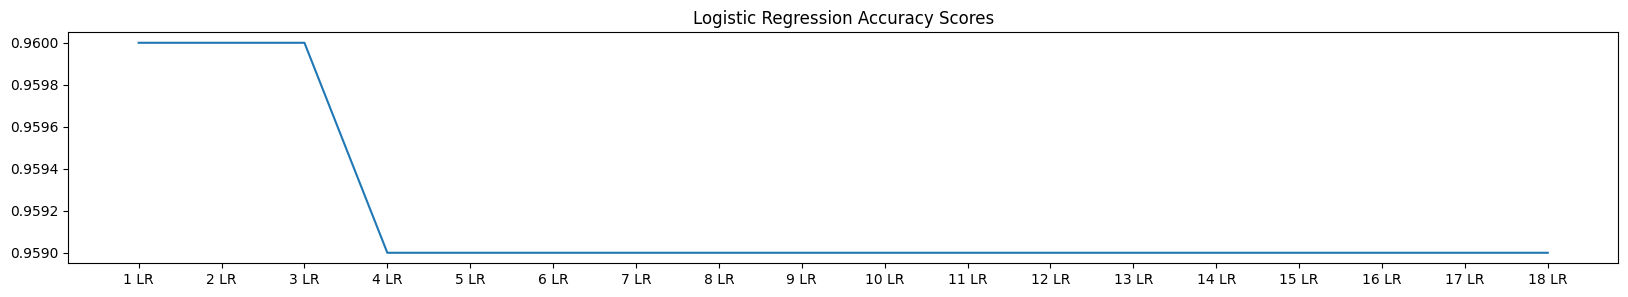

In [258]:
val_list = []
for i in range(1, len(viz_LR)+1):
    label = str(i) + ' LR'
    val_acc = viz_LR[label][0]
    val_list.append(val_acc)
# plt.rcParams["figure.figsize"] = (20,3)
plt.title('Logistic Regression Accuracy Scores')   
plt.plot(viz_LR.keys(), val_list)

In [300]:
# function to plot accuracy by parameters and model

def viz_param(model, parameter):
    if model == 'LR':
        if parameter in viz_LR['1 LR'][1].keys():
            val_list = []
            param_list = []
            for i in range(1, len(viz_LR)+1):
                label = str(i) + ' LR'
                val_acc = viz_LR[label][0]
                val_list.append(val_acc)
                param_val = viz_LR[label][1][parameter]
                param_list.append(param_val)
            # plt.rcParams["figure.figsize"] = (20,3)
            plt.title(f'Logistic Regression Accuracy by Parameter: \'{parameter}\'')
            plt.scatter(param_list, val_list, label = parameter, color = 'red')
            plt.show()
    else:
        if parameter in viz_RF['1 RF'][1].keys():
            val_list = []
            param_list = []
            for i in range(1, len(viz_RF)+1):
                label = str(i) + ' RF'
                val_acc = viz_RF[label][0]
                val_list.append(val_acc)
                param_val = viz_RF[label][1][parameter]
                param_list.append(param_val)
            # plt.rcParams["figure.figsize"] = (20,3)
            plt.title(f'Random Forest Accuracy by Parameter: \'{parameter}\'')
            plt.scatter(param_list, val_list, label = parameter, color = 'blue')
            plt.show()
        

In [290]:
viz_LR['1 LR'][1].keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [298]:
viz_RF['1 RF'][1].keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

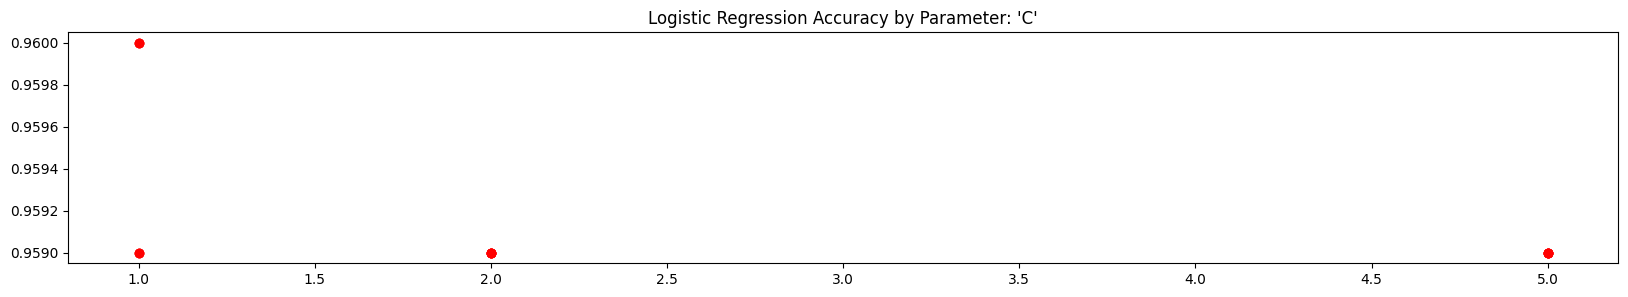

In [302]:
viz_param('LR', 'C')

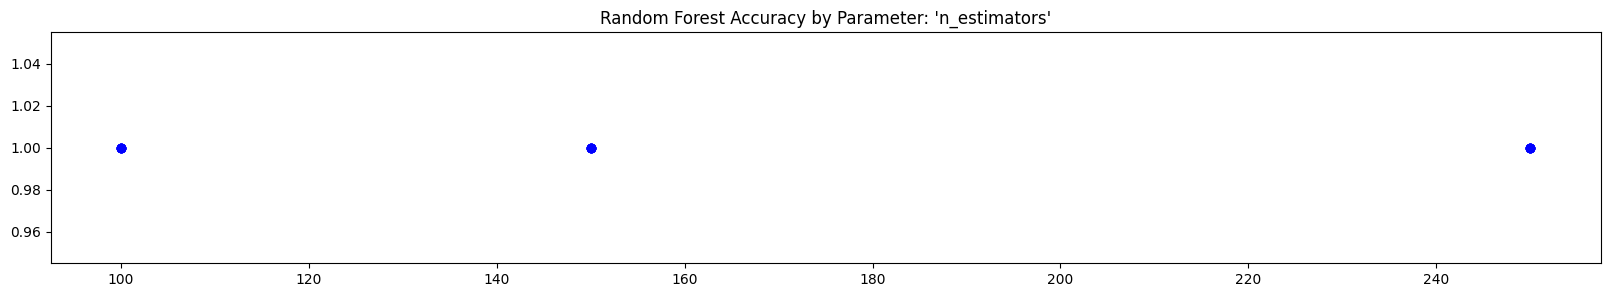

In [301]:
viz_param('RF', 'n_estimators')